In [2]:
import calendar
from datetime import datetime, timezone
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

# Exercise 1: Intraday seasonality

In [3]:
data = np.loadtxt('eur_usd_20120101_20120301.txt')

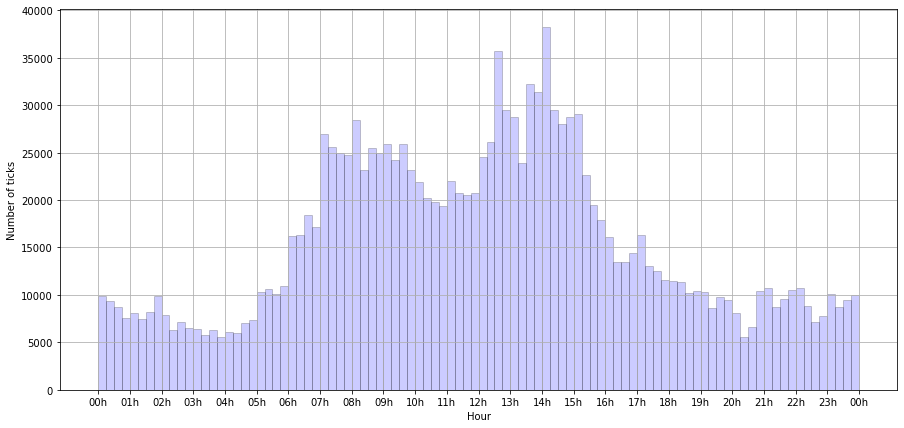

In [4]:
times = data[:, 0] % (3600 * 24)
bins = np.arange(0, 24 * 60 * 60 + 15 * 60, 15 * 60)

fig = plt.figure(figsize=(15, 7))
ax = plt.gca()
ax.grid('on')
ax.hist(times, bins, lw=1, ec="black", fc="blue", alpha=.2)
ax.set(xlabel='Hour', ylabel='Number of ticks')
plt.xticks(ticks=bins[::4], labels=[datetime.fromtimestamp(x, timezone.utc).strftime('%Hh') for x in bins[::4]])
plt.show()

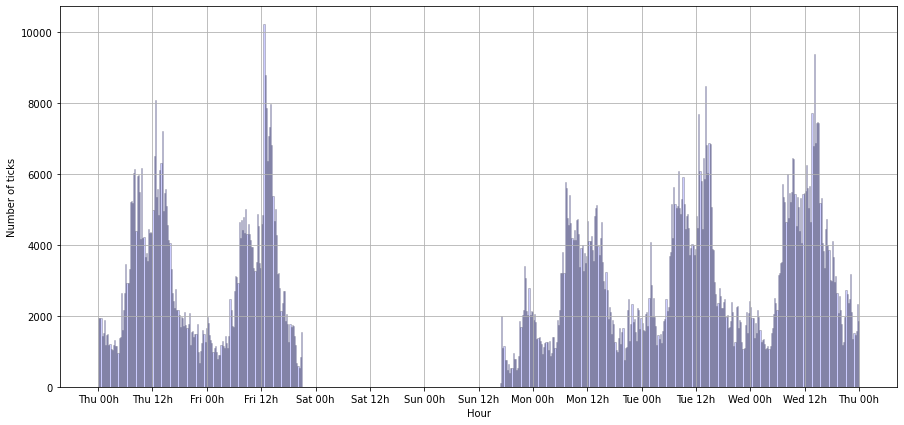

In [5]:
times = (data[:, 0]) % (3600 * 24 * 7)
bins = np.arange(0, 24 * 60 * 60 * 7 + 15 * 60, 15 * 60)

fig = plt.figure(figsize=(15, 7))
ax = plt.gca()
ax.grid('on')
ax.hist(times, bins, lw=1, ec="black", fc="blue", alpha=.2)
ax.set(xlabel='Hour', ylabel='Number of ticks')
plt.xticks(ticks=bins[::48], labels=[datetime.fromtimestamp(x, timezone.utc).strftime('%a %Hh') for x in bins[::48]])
plt.show()

# Exercise 2: AR(1) process

In [6]:
def generate_ar1(phi_1, x0=0, T=300):
    s = [x0]
    for _ in range(T - 1):
        s.append(phi_1 * s[-1] + np.random.randn())
    return s

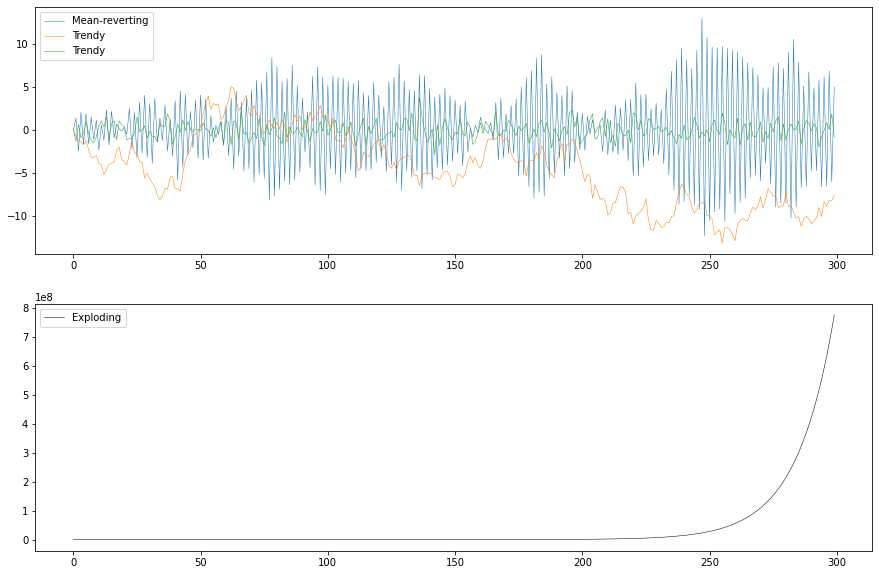

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

ax = axes[0]
for phi_1 in [-1, 1, 0]:
    s = generate_ar1(phi_1)
    if phi_1 == -1:
        label = 'Mean-reverting'
    if phi_1 == 1:
        label = 'Trendy'
    if phi_1 == 0.01:
        label = 'Stationary'
    ax.plot(s)[0].set(linewidth=0.5, label=label)
ax.legend()

ax = axes[1]
s = generate_ar1(phi_1=1.07)
ax.plot(s)[0].set(color='black', linewidth=0.5, label='Exploding')
ax.legend()

plt.show()